# MSE Homework 7

In [1]:
from thermostate import Q_
import math
import numpy as np

# Problem 7.12 

Consider a metal single crystal oriented such that the normal to the slip plane and the slip direction are at angles of 60° and 35°, respectively, with the tensile axis. If the critical resolved shear stress is 6.2 MPa (900 psi), will an applied stress of 12 MPa (1750 psi) cause the single crystal to yield? If not, what stress will be necessary?

# Solution

$$\tau_R = \sigma cos(\phi)cos(\lambda)$$

Where:

$\phi$ is the angle normal to the slip plane

$\lambda$ is the direction of the slip plane

So the ultimate question is if $\sigma cos(\phi)cos(\lambda) \ge \tau_R$

In [2]:
phi = Q_(60, "deg")
lamb = Q_(35, "deg")
sigma = Q_(12, "MPa")
tau = Q_(6.2, "MPa")
LHS = sigma*np.cos(phi)*np.cos(lamb)
LHS = LHS.round(1)
print("{} is less than {} so the crystal will not yield".format(LHS,tau))

4.9 megapascal is less than 6.2 megapascal so the crystal will not yield


Yeilding would occuer at a stress of:

$$\sigma_y = \frac{\tau_{RCritical}}{cos(\phi)cos(\lambda)}$$

In [3]:
sigma_y = tau/(np.cos(phi)*np.cos(lamb))
print(sigma_y.round(2))

15.14 megapascal


# Problem 7.23 

Describe in your own words the three strengthening mechanisms discussed in this chapter (i.e., grain size reduction, solid-solution strengthening, and strain hardening). Explain how dislocations are involved in each of the strengthening techniques.

# Solution

In grain size reduction, smaller grains form grain boundaries which block the dislocation motion. This is for two reasons. Firstly, the boundaries force the dislocation motion to change direction. Secondly, it is just a discontinuty of the slip planes. 

In solid-solution strengthening, impurity atoms go into the solid solution, both substitutionally and interstitially. This forms latice strain interactions between impurity atoms. These interatctions produce a decrease in dislocation motion.

Strain harderning increases the strength in plastic deformation while decreaseing ductility. Repulsive dislocation-dislocation strain fields interact and decrease overall disloaction mobility.

# Problem 7.24 

(a) From the plot of yield strength versus (grain diameter)$^{–1/2}$ for a 70 Cu–30 Zn cartridge brass in Figure 7.15, determine values for the constants $\sigma_o$ and $k_y$ in Equation 7.7.

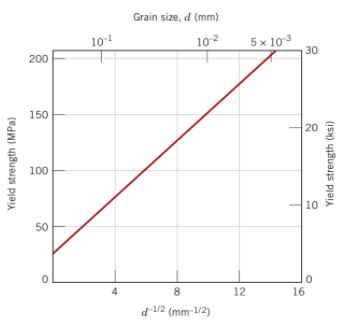

(b) Now predict the yield strength of this alloy when the average grain diameter is 2.0 ×
10$^{–3}$ mm

# Solution

We know that:

$$\sigma_y=\sigma_o + \frac{k}{\sqrt d}$$

If we wanted to find $\sigma_o$ we can test a point where $d = 0$. Then we can just compare against any point to find $k$ after that.

Looking at the graph it seems when $d=0$ that $\sigma_y = 25$ MPa so that means $\sigma_o = 25$ MPa.

Next we we'll say at $\frac{1}{\sqrt d} = 4$, $\sigma_y = 75$ MPa.  

$$\sigma_y=\sigma_o + k\cdot\frac{1}{\sqrt d}$$

In [4]:
sigma_y = Q_(75, "MPa")
sigma_o = Q_(25, "MPa")
inverse_sqrt_d = Q_(4, "mm^-0.5")

k = (sigma_y-sigma_o)/inverse_sqrt_d
print(k)

12.5 megapascal * millimeter ** 0.5


Now that we know our constants, we can find $\sigma_y$ for any $d$

In [5]:
d = Q_(2.0e-3, "mm")
sigma_y = sigma_o + k * (1/d**0.5)
print(sigma_y.round(2))

304.51 megapascal


# Problem 7.41 

The average grain diameter for a brass material was measured as a function of time at 650°C, which is shown in the following table at two different times, use n as 2:

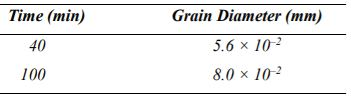

(a) What was the original grain diameter?

(b) What grain diameter would you predict after 200 min at 650°C?

# Solution

For this problem we know:

$$d^n - d_o^n = Kt$$

And we will write a system of equations to find out two constants $K$ and $d_o$
 
$$d_1^n - d_o^n = K\cdot t_1$$

$$d_2^n - d_o^n = K\cdot t_2$$

Rearranging the equations yields:

$$K\cdot t_1 - d_1^n = K\cdot t_2 - d_2^n $$

$$K\cdot t_1 - K\cdot t_2 = d_1^n - d_2^n $$

$$K = \frac{d_1^n - d_2^n}{t_1-t_2}$$

In [6]:
n = 2
t1 = Q_(40, "min")
t2 = Q_(100, "min")
d1 = Q_(5.6e-2, "mm")
d2 = Q_(8e-2, "mm")
K = (d1**n-d2**n)/(t1-t2)
print(K)

5.44e-05 millimeter ** 2 / minute


Now knowing $K$ we can rearrange the first equation to yield:

$$d_o = (d_1^n-Kt_1)^{\frac{1}{n}}$$

In [7]:
d_o = (d1**n - K*t1)**(1/n)
print(d_o.round(3))

0.031 millimeter


And now that we know all of our constants, we can plug in any time and find $d$:

$$d = (Kt - d_o^n)^{\frac{1}{n}}$$

In [8]:
t = Q_(200, "min")
d = (K*t+d_o**n)**(1/n)
print(d.round(3))

0.109 millimeter


# Problem 7.43 

Grain growth is strongly dependent on temperature (i.e., rate of grain growth increases with increasing temperature), yet temperature is not explicitly included in Equation 7.9: $$d^n-d_o^n=Kt$$

(a) Into which of the parameters in this expression would you expect temperature to be included?

(b) On the basis of your intuition, cite an explicit expression for this temperature
dependence.

# Solution

Based on previous properties, I would way that temperature is baked into the K constant in the following expression:

$$K=K_oexp(\frac{-Q_k}{RT})$$